# Árvores II - Tarefa 3

### 1. Carregar as bases

Vamos utilizar nesta tarefa as bases de reconhecimento de atividade humana através do celular. Carregue novamente as bases salvas na tarefa I.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

In [52]:
X_train = pd.read_csv('data/X_train.csv', index_col=[0,1])
X_test = pd.read_csv('data/X_test.csv', index_col=[0,1])

In [53]:
y_train = pd.read_csv('data/y_train.csv', index_col=[0])
y_test = pd.read_csv('data/y_test.csv', index_col=[0])

### 2. Calcule os ```ccp_alphas```. 

Vamos seguir uma lógica bem em linha com o que já estamso acostumados, com as seguintes orientações:

- Utilizar treinamento e teste conforme já vieram definidos originalmente
- Por pragmatismo, utilizar ```min_samples_leaf=20```
- Utilize as mesmas "3 melhores variáveis" identificadas no exercício anterior.

In [65]:
clf = DecisionTreeClassifier(min_samples_leaf=20).fit(X_train, y_train)
importances = clf.feature_importances_

sorted_indices = np.argsort(importances)
features = np.array(X_train.columns)[[sorted_indices[-3:]]]

features

array([['angle(Y,gravityMean)', 'fBodyAcc-mad()-X',
        'tGravityAcc-min()-X']], dtype=object)

In [55]:
X_train_best = X_train.iloc[:,sorted_indices[-3:]]
X_test_best = X_test.iloc[:,sorted_indices[-3:]]

In [14]:
path = DecisionTreeClassifier(random_state=42).cost_complexity_pruning_path(X_train_best, y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas = np.unique(ccp_alphas[ccp_alphas>=0])
ccp_alphas

array([0.00000000e+00, 8.63602605e-05, 9.00932524e-05, 9.06782735e-05,
       1.01257405e-04, 1.02013058e-04, 1.08813928e-04, 1.13347842e-04,
       1.13347842e-04, 1.16586352e-04, 1.17469582e-04, 1.19015234e-04,
       1.19824861e-04, 1.20904365e-04, 1.22415669e-04, 1.22415669e-04,
       1.23652191e-04, 1.24015874e-04, 1.24682626e-04, 1.25554533e-04,
       1.25942047e-04, 1.26301881e-04, 1.26301881e-04, 1.26949583e-04,
       1.27516322e-04, 1.28016386e-04, 1.28460887e-04, 1.28858599e-04,
       1.29263933e-04, 1.29540391e-04, 1.30576714e-04, 1.31094875e-04,
       1.31406651e-04, 1.31483497e-04, 1.31629752e-04, 1.32131199e-04,
       1.32167861e-04, 1.32239149e-04, 1.32341264e-04, 1.32390279e-04,
       1.32529784e-04, 1.32854215e-04, 1.33102751e-04, 1.33750453e-04,
       1.34358661e-04, 1.34813716e-04, 1.35815604e-04, 1.35979310e-04,
       1.36017410e-04, 1.37614281e-04, 1.37707067e-04, 1.37949050e-04,
       1.40139150e-04, 1.41226064e-04, 1.41684802e-04, 1.45085238e-04,
      

### 3. *Grid Search*

Vou deixar especificações iniciais mínimas, que visam limitar o tempo de máquina, pois um procedimento desses pode demorar muito tempo dependendo da especificação. Mas conforme você for ficando confortável com o tempo consumido pelo procedimento, pode fazer um algoritmo mais exaustivo, por exemplo, avaliando mais valores de ```ccp_alpha```.

- Meça o tempo
- Utilize a base de treinamento
- Utilize um *cross validation* do tipo *k-fold*, especifique k=10
- Você pode ler 1 a cada ```k``` valores para uma melhor varredura utilizando, por exemplo, ```ccp_alpha[::10]```
- Não se esqueça de limitar o número de variáveis

In [16]:
clf = DecisionTreeClassifier(random_state=42)
grid_parametros = {'ccp_alpha':ccp_alphas}

In [17]:
%%time
grid = GridSearchCV(estimator = clf, param_grid=grid_parametros, cv=10, verbose=100)
grid.fit(X_train_best, y_train) 

Fitting 10 folds for each of 269 candidates, totalling 2690 fits
[CV 1/10; 1/269] START ccp_alpha=0.0............................................
[CV 1/10; 1/269] END .............ccp_alpha=0.0;, score=0.783 total time=   0.0s
[CV 2/10; 1/269] START ccp_alpha=0.0............................................
[CV 2/10; 1/269] END .............ccp_alpha=0.0;, score=0.707 total time=   0.0s
[CV 3/10; 1/269] START ccp_alpha=0.0............................................
[CV 3/10; 1/269] END .............ccp_alpha=0.0;, score=0.844 total time=   0.0s
[CV 4/10; 1/269] START ccp_alpha=0.0............................................
[CV 4/10; 1/269] END .............ccp_alpha=0.0;, score=0.683 total time=   0.0s
[CV 5/10; 1/269] START ccp_alpha=0.0............................................
[CV 5/10; 1/269] END .............ccp_alpha=0.0;, score=0.725 total time=   0.0s
[CV 6/10; 1/269] START ccp_alpha=0.0............................................
[CV 6/10; 1/269] END .............ccp_alpha=

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'ccp_alpha': array([0.00000000e+00, 8.63602605e-05, 9.00932524e-05, 9.06782735e-05,
       1.01257405e-04, 1.02013058e-04, 1.08813928e-04, 1.13347842e-04,
       1.13347842e-04, 1.16586352e-04, 1.17469582e-04, 1.19015234e-04,
       1.19824861e-04, 1.20904365e-04, 1.22415669e-04, 1.22415669e-04,
       1.23652191...
       1.79719950e-03, 1.88062105e-03, 1.90094443e-03, 1.90782047e-03,
       2.04607727e-03, 2.04997637e-03, 2.12674961e-03, 2.16385984e-03,
       2.24422866e-03, 2.49959739e-03, 2.59007682e-03, 2.79693358e-03,
       3.26048062e-03, 3.60621242e-03, 4.20267585e-03, 5.31083069e-03,
       5.34572911e-03, 6.88407984e-03, 8.24712763e-03, 1.17255727e-02,
       4.41235910e-02, 4.67250302e-02, 1.09363718e-01, 1.67257720e-01,
       1.86138242e-01])},
             verbose=100)

In [26]:
grid.best_score_

0.7908028320023661

### 4. Avaliando a árvore

- Obtenha a árvore na melhor configuração treinada em toda a base de treino
- Calcule a acurácia dessa árvore na base de testes
- Visualize a matriz de confusão

In [23]:
best_clf = DecisionTreeClassifier(ccp_alpha=0.0036062124242923956, random_state=42).fit(X_train_best, y_train)

In [28]:
activity_label = pd.read_csv('data/UCI HAR Dataset/activity_labels.txt', delim_whitespace=True, header=None, index_col=[0], names=['Index', 'Activity'])

Acurácia: 71.12


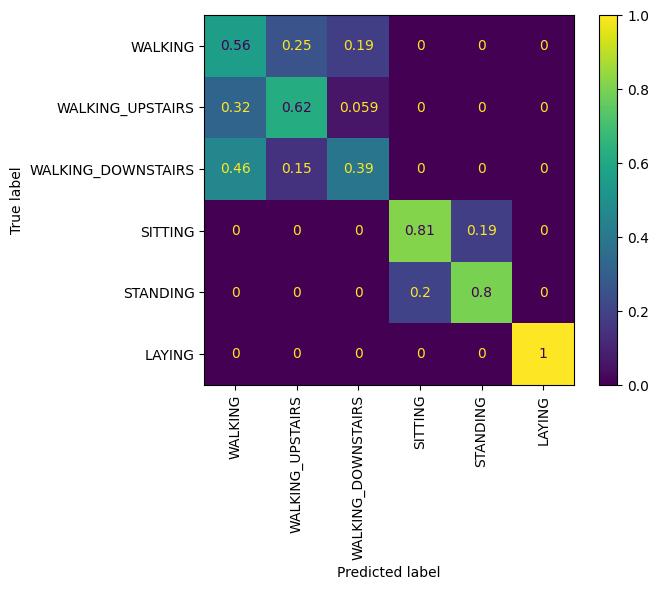

In [34]:
score = best_clf.score(X_test_best, y_test)

print(f'Acurácia: {score*100:.2f}')
cm = confusion_matrix(y_test, best_clf.predict(X_test_best), normalize='true')
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=activity_label.iloc[:,0].values).plot()
plt.xticks(rotation=90);

### 5. Melhorando a árvore

A melhor forma de se melhorar um algoritmo é colocando nele novas variáveis que agreguem valor. Podemos usar a força-bruta e ir colocando variáveis aleatoriamente - ou colocar todas e deixar rodando por um bom tempo - ou utilizar uma lógica eficiente e fazer uma seleção de variáveis.

- Observe que há classes mais fáceis e mais difíceis de se identificar
- Crie uma variável binária para uma das classes de maior erro
- Fala uma árvore de classificação bem simples para esta variável:
    - utilize ```mean_samples_leaf=20```
    - utilize ```max_depth=4```
    - coloque todas as variáveis
- Observe a importância das variáveis, e selecione as 3 com maior importância
- Rode novamente o algoritmo acima com as 3 novas variáveis e avalie a acurácia

In [78]:
y_train_dum = y_train.copy()
y_train_dum['activity'] = y_train_dum['activity'].apply(lambda x: 1 if x == 3 else 0)
y_train_dum.value_counts()

activity
0           6366
1            986
dtype: int64

In [79]:
clf_dum = DecisionTreeClassifier(min_samples_leaf=20, max_depth=4).fit(X_train, y_train_dum)
importances_dum = clf_dum.feature_importances_

sorted_indices_dum = np.argsort(importances_dum)
features_dum = np.array(X_train.columns)[[sorted_indices_dum[-3:]]]

features_dum

array([['fBodyAccMag-mad()', 'tBodyGyro-correlation()-Y,Z',
        'tBodyAcc-max()-X']], dtype=object)

In [84]:
list(sorted_indices_dum[-3:])

[504, 159, 9]

In [81]:
sorted_indices[-3:]

array([559, 271,  52])

In [87]:
sorted_indices_new = list(sorted_indices_dum[-3:]) + list(sorted_indices[-3:])

In [88]:
X_train_best = X_train.iloc[:,sorted_indices_new]
X_test_best = X_test.iloc[:,sorted_indices_new]

In [89]:
path = DecisionTreeClassifier(random_state=42).cost_complexity_pruning_path(X_train_best, y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas = np.unique(ccp_alphas[ccp_alphas>=0])

In [90]:
clf = DecisionTreeClassifier(random_state=42)
grid_parametros = {'ccp_alpha':ccp_alphas}

In [91]:
%%time
grid = GridSearchCV(estimator = clf, param_grid=grid_parametros, cv=10, verbose=100)
grid.fit(X_train_best, y_train) 

Fitting 10 folds for each of 201 candidates, totalling 2010 fits
[CV 1/10; 1/201] START ccp_alpha=0.0............................................
[CV 1/10; 1/201] END .............ccp_alpha=0.0;, score=0.802 total time=   0.0s
[CV 2/10; 1/201] START ccp_alpha=0.0............................................
[CV 2/10; 1/201] END .............ccp_alpha=0.0;, score=0.784 total time=   0.0s
[CV 3/10; 1/201] START ccp_alpha=0.0............................................
[CV 3/10; 1/201] END .............ccp_alpha=0.0;, score=0.797 total time=   0.0s
[CV 4/10; 1/201] START ccp_alpha=0.0............................................
[CV 4/10; 1/201] END .............ccp_alpha=0.0;, score=0.767 total time=   0.0s
[CV 5/10; 1/201] START ccp_alpha=0.0............................................
[CV 5/10; 1/201] END .............ccp_alpha=0.0;, score=0.751 total time=   0.0s
[CV 6/10; 1/201] START ccp_alpha=0.0............................................
[CV 6/10; 1/201] END .............ccp_alpha=

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'ccp_alpha': array([0.00000000e+00, 1.19015234e-04, 1.22415669e-04, 1.23652191e-04,
       1.25554533e-04, 1.26949583e-04, 1.27146710e-04, 1.28858599e-04,
       1.29216540e-04, 1.30884678e-04, 1.30979728e-04, 1.31159646e-04,
       1.31483497e-04, 1.31629752e-04, 1.31766866e-04, 1.32341264e-04,
       1.32451411...
       1.30022044e-03, 1.42640642e-03, 1.43656387e-03, 1.74124503e-03,
       1.94472893e-03, 2.16385984e-03, 2.30547545e-03, 2.35516225e-03,
       2.62653795e-03, 2.62915030e-03, 2.76809581e-03, 3.19201159e-03,
       3.41073833e-03, 4.26469202e-03, 4.36468302e-03, 5.19929534e-03,
       6.88407984e-03, 7.11722586e-03, 8.29745172e-03, 1.53534147e-02,
       4.54700467e-02, 8.92180105e-02, 1.09363718e-01, 1.67257720e-01,
       1.86138242e-01])},
             verbose=100)

In [97]:
best_clf_new = DecisionTreeClassifier(ccp_alpha=0.015353414749739409, random_state=42).fit(X_train_best, y_train)

Acurácia: 77.54


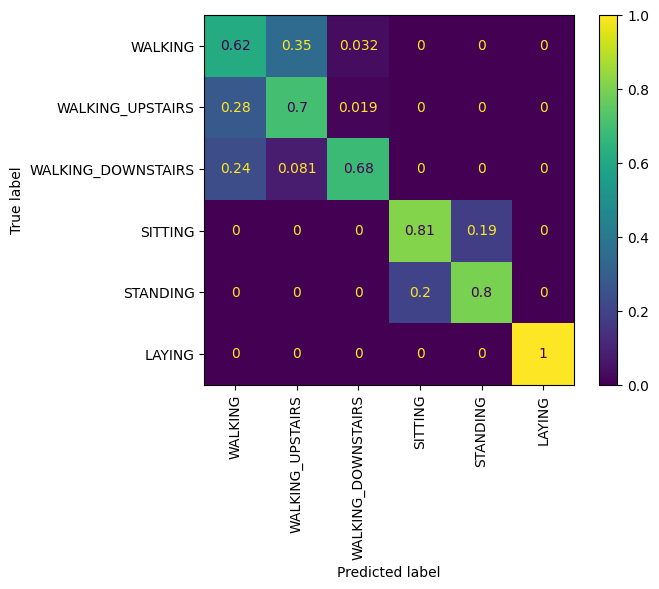

In [98]:
score = best_clf_new.score(X_test_best, y_test)

print(f'Acurácia: {score*100:.2f}')
cm = confusion_matrix(y_test, best_clf_new.predict(X_test_best), normalize='true')
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=activity_label.iloc[:,0].values).plot()
plt.xticks(rotation=90);